In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime

In [47]:
df = pd.read_excel("realistic_focus_data.xlsx")

In [4]:
df.head()

,Session ID,Date,Day,Start Time,End Time,Task Type,App Switch Count,Distraction Duration (mins),Total Focus Duration (mins),Focus Score (0-10),Productivity %
0,1,2024-03-01,Friday,09:40,11:30,Work,7,25,85,1.5,77.27
1,2,2024-03-01,Friday,08:58,10:37,Deep Work,6,0,99,7.0,100.00
2,3,2024-03-01,Friday,12:37,14:59,Study,0,26,116,4.8,81.69
3,4,2024-03-01,Friday,07:01,07:54,Deep Work,1,13,40,6.9,75.47
4,5,2024-03-02,Saturday,06:01,07:31,Deep Work,6,14,76,4.2,84.44


In [5]:
df['Start Hour'] = pd.to_datetime(df['Start Time'], format='%H:%M').dt.hour

In [6]:
df

,Session ID,Date,Day,Start Time,End Time,Task Type,App Switch Count,Distraction Duration (mins),Total Focus Duration (mins),Focus Score (0-10),Productivity %,Start Hour
0,1,2024-03-01,Friday,09:40,11:30,Work,7,25,85,1.5,77.27,9
1,2,2024-03-01,Friday,08:58,10:37,Deep Work,6,0,99,7.0,100.00,8
2,3,2024-03-01,Friday,12:37,14:59,Study,0,26,116,4.8,81.69,12
3,4,2024-03-01,Friday,07:01,07:54,Deep Work,1,13,40,6.9,75.47,7
4,5,2024-03-02,Saturday,06:01,07:31,Deep Work,6,14,76,4.2,84.44,6
...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,2024-03-29,Friday,07:09,09:21,Study,1,59,73,0.0,55.30,7
88,89,2024-03-30,Saturday,11:49,14:03,Meeting,0,58,76,0.0,56.72,11
89,90,2024-03-30,Saturday,06:40,08:38,Study,1,7,111,8.1,94.07,6
90,91,2024-03-30,Saturday,14:09,15:41,Work,2,44,48,0.2,52.17,14


In [18]:
time_analysis = df.groupby(['Day', 'Start Hour'])['Total Focus Duration (mins)'].mean().unstack()
time_analysis

Start Hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Day,,,,,,,,,,,,,,,,,
Friday,NaN,97.0,84.5,85.0,NaN,NaN,111.0,NaN,NaN,82.0,61.0,NaN,NaN,NaN,NaN,49.0,115.0
Monday,NaN,130.0,NaN,NaN,99.5,NaN,NaN,35.0,59.0,51.0,NaN,107.000000,32.0,NaN,44.0,64.5,49.0
Saturday,97.0,120.0,102.0,NaN,58.0,76.0,108.0,132.0,57.0,134.0,NaN,83.666667,51.0,60.0,NaN,NaN,142.0
Sunday,NaN,NaN,65.0,NaN,NaN,NaN,114.0,44.0,NaN,101.5,NaN,NaN,NaN,76.0,48.0,NaN,82.0
Thursday,55.0,103.5,120.0,104.0,111.0,NaN,NaN,92.0,NaN,NaN,75.0,NaN,NaN,108.0,NaN,NaN,NaN
Tuesday,NaN,55.0,NaN,71.0,NaN,122.0,66.0,NaN,NaN,75.5,NaN,NaN,NaN,NaN,NaN,64.0,NaN
Wednesday,NaN,117.0,77.5,88.0,25.0,46.0,NaN,106.0,82.0,91.0,NaN,36.000000,64.0,129.0,NaN,NaN,NaN


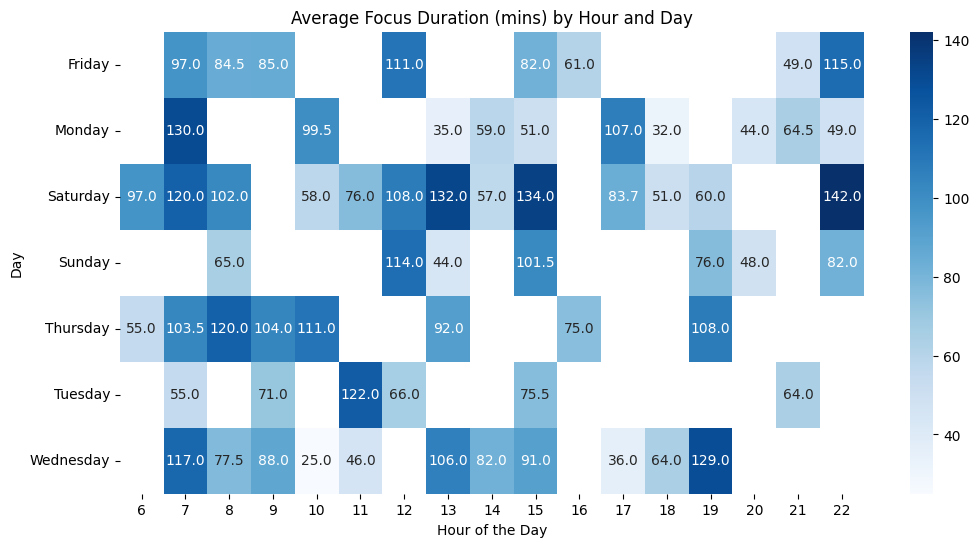

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(time_analysis, cmap="Blues", annot=True, fmt=".1f")
plt.title("Average Focus Duration (mins) by Hour and Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day")
plt.show()

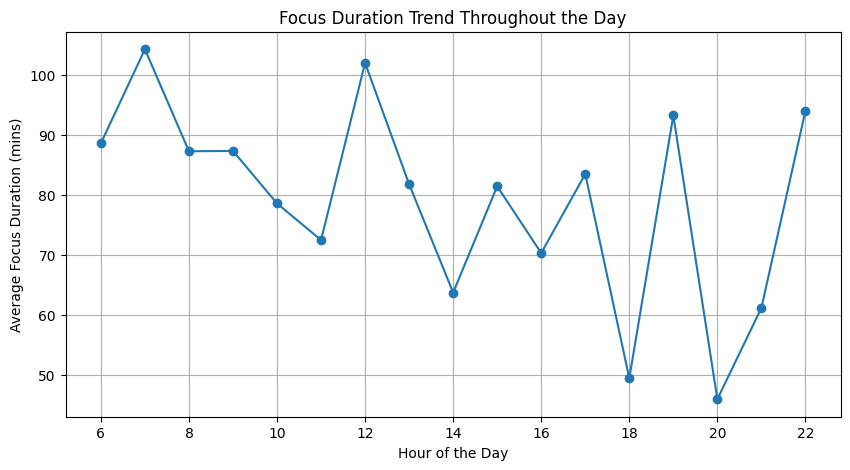

In [20]:
plt.figure(figsize=(10, 5))
df.groupby('Start Hour')['Total Focus Duration (mins)'].mean().plot(kind='line', marker='o')
plt.title("Focus Duration Trend Throughout the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Focus Duration (mins)")
plt.grid()
plt.show()

In [22]:
focus_by_hour = df.groupby('Start Hour')[['Total Focus Duration (mins)']].mean()
focus_by_hour

,Total Focus Duration (mins)
Start Hour,
6,88.600000
7,104.272727
8,87.285714
9,87.333333
10,78.600000
11,72.500000
12,102.000000
13,81.800000
14,63.750000


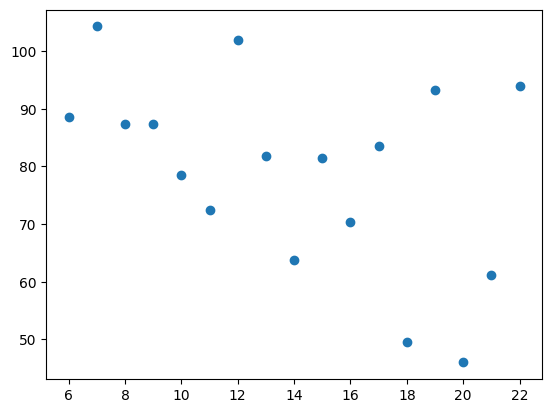

In [25]:
plt.scatter(focus_by_hour.index , focus_by_hour["Total Focus Duration (mins)"])

In [48]:

df['Hour'] = pd.to_datetime(df['Start Time'], format='%H:%M').dt.hour  # Extract hour for analysis

In [49]:
df

,Session ID,Date,Day,Start Time,End Time,Task Type,App Switch Count,Distraction Duration (mins),Total Focus Duration (mins),Focus Score (0-10),Productivity %,Hour
0,1,2024-03-01,Friday,09:40,11:30,Work,7,25,85,1.5,77.27,9
1,2,2024-03-01,Friday,08:58,10:37,Deep Work,6,0,99,7.0,100.00,8
2,3,2024-03-01,Friday,12:37,14:59,Study,0,26,116,4.8,81.69,12
3,4,2024-03-01,Friday,07:01,07:54,Deep Work,1,13,40,6.9,75.47,7
4,5,2024-03-02,Saturday,06:01,07:31,Deep Work,6,14,76,4.2,84.44,6
...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,2024-03-29,Friday,07:09,09:21,Study,1,59,73,0.0,55.30,7
88,89,2024-03-30,Saturday,11:49,14:03,Meeting,0,58,76,0.0,56.72,11
89,90,2024-03-30,Saturday,06:40,08:38,Study,1,7,111,8.1,94.07,6
90,91,2024-03-30,Saturday,14:09,15:41,Work,2,44,48,0.2,52.17,14


In [50]:
time_analysis = df.groupby(['Day', 'Hour']).agg({
    'Total Focus Duration (mins)': 'mean',
    'Focus Score (0-10)': 'mean',
    'Productivity %': 'mean'
}).reset_index()

In [51]:
time_analysis

,Day,Hour,Total Focus Duration (mins),Focus Score (0-10),Productivity %
0,Friday,7,97.0,5.05,77.435
1,Friday,8,84.5,3.50,77.130
2,Friday,9,85.0,1.50,77.270
3,Friday,12,111.0,6.25,86.930
4,Friday,15,82.0,3.80,75.950
...,...,...,...,...,...
58,Wednesday,14,82.0,5.10,92.130
59,Wednesday,15,91.0,0.00,58.710
60,Wednesday,17,36.0,6.60,94.740
61,Wednesday,18,64.0,0.00,58.720


In [52]:
time_analysis['Combined Score'] = (
    time_analysis['Total Focus Duration (mins)'] * 0.4 +
    time_analysis['Focus Score (0-10)'] * 0.3 +
    time_analysis['Productivity %'] * 0.3
)


In [54]:
max(time_analysis["Combined Score"])

86.983

In [55]:
best_time = time_analysis.sort_values(by='Combined Score', ascending=False).head(5)
print("Best Focus Periods:")
print(best_time[['Day', 'Hour', 'Combined Score']])

Best Focus Periods:
         Day  Hour  Combined Score
30  Saturday    22         86.9830
24  Saturday    13         83.6070
26  Saturday    15         83.3630
7     Friday    22         77.2990
8     Monday     7         76.2595


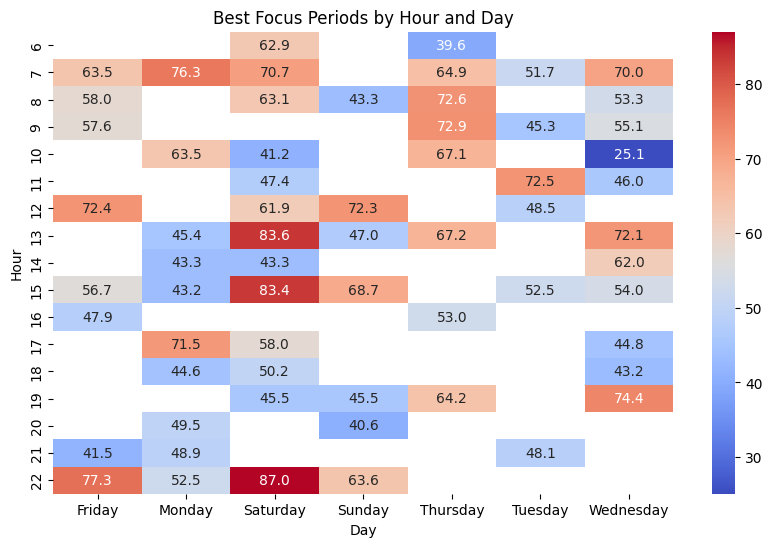

In [57]:
pivot_table = time_analysis.pivot_table(values='Combined Score', index='Hour', columns='Day', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Best Focus Periods by Hour and Day")
plt.show()
